- [Reading and understanding the data](#read)
- [Data visualization and explanatory data analysis](#visual)
- [Feature engineering: Data prep for the model](#prepare)
- [Model building](#build)
- [Model evaluation](#eval1)
- [Model optimization: hyper parameter tuning](#hyper)
- [Model re-evaluation](#eval2)

### **<a id = "read">Reading and understanding the data</a>**

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


C:\Users\toler\AppData\Local\Temp\ipykernel_22856\73500830.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Species", data=df, palette="viridis")


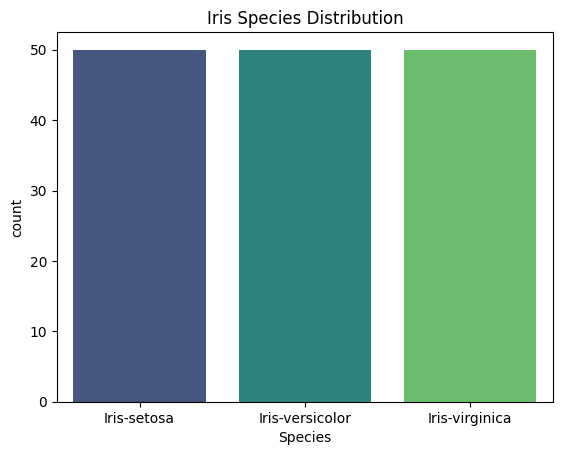

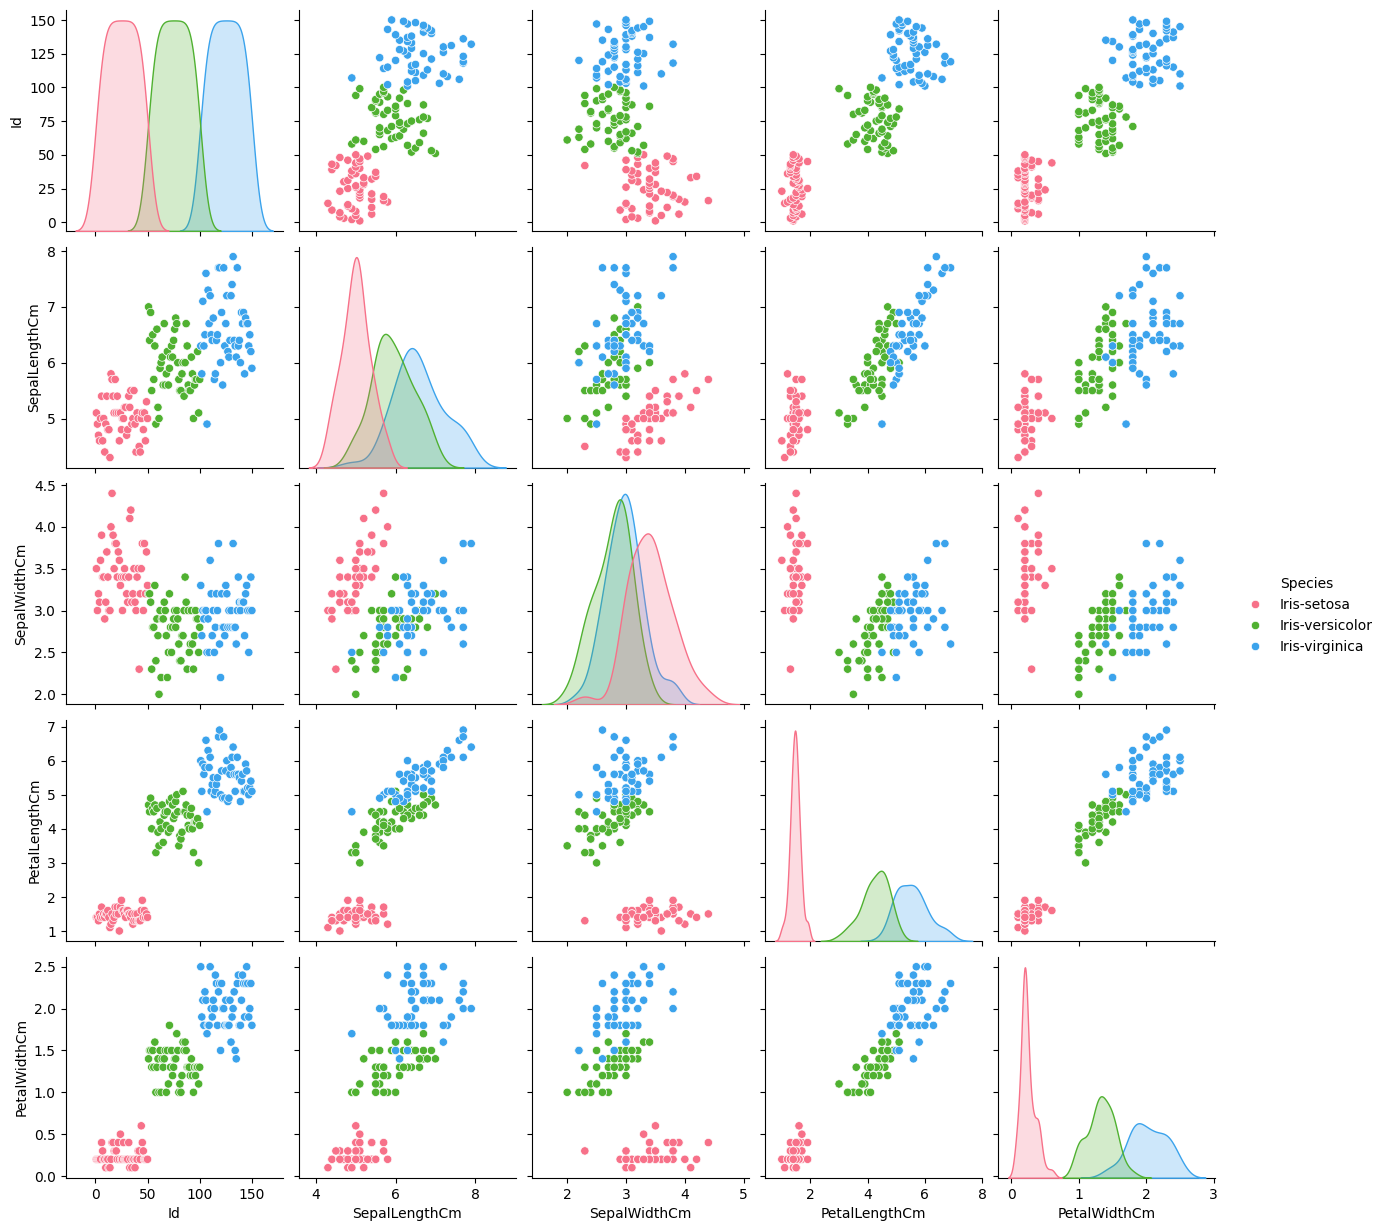

Training samples: 120, Testing samples: 30
✅ Model Accuracy: 0.90
🎉 Model & Encoder saved successfully!
🌸 Predicted Species: Iris-setosa


C:\Users\toler\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
# 📌 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# ----------------------------------------------
# 📌 Step 2: Load & Explore Data
# ----------------------------------------------
df = pd.read_csv("../data/iris.csv")  # Ensure dataset exists in 'data/' folder
display(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Plot Class Distribution
sns.countplot(x="Species", data=df, palette="viridis")
plt.title("Iris Species Distribution")
plt.show()


# Pairplot for feature relationships
sns.pairplot(df, hue="Species", palette="husl")
plt.show()

# ----------------------------------------------
# 📌 Step 3: Data Preprocessing
# ----------------------------------------------
# Convert species names to numbers
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]

# Split data into features (X) and target (y)
X = df.drop(columns=["Species"])
y = df["Species"]

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# ----------------------------------------------
# 📌 Step 4: Train Machine Learning Model
# ----------------------------------------------
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

# ----------------------------------------------
# 📌 Step 5: Save Model & Label Encoder
# ----------------------------------------------
joblib.dump(model, "iris_model.pkl")
joblib.dump(le, "label_encoder.pkl")
print("🎉 Model & Encoder saved successfully!")

# ----------------------------------------------
# 📌 Step 6: Make a Prediction
# ----------------------------------------------
# Load saved model & encoder
loaded_model = joblib.load("iris_model.pkl")
loaded_le = joblib.load("label_encoder.pkl")

# Example input for prediction (sepal & petal measurements)

sample_input = [5.1, 3.5, 1.4, 0.2]
predicted_class = loaded_model.predict([sample_input])
predicted_species = loaded_le.inverse_transform(predicted_class)

print(f"🌸 Predicted Species: {predicted_species[0]}")


In [1]:
# import the necessary liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visuals
import seaborn as sns # advanced visuals
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv("Iris.csv")

In [3]:
# display the first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# main characteristics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# drop Id, axis = 1: tells python to drop the entire column
# Do not run this cell more than once
df = df.drop("Id", axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# How many species in our dataframe?
# is the data balanced?
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### **<a id = 'visual'>Data visualization and explanatory data analysis</a>**

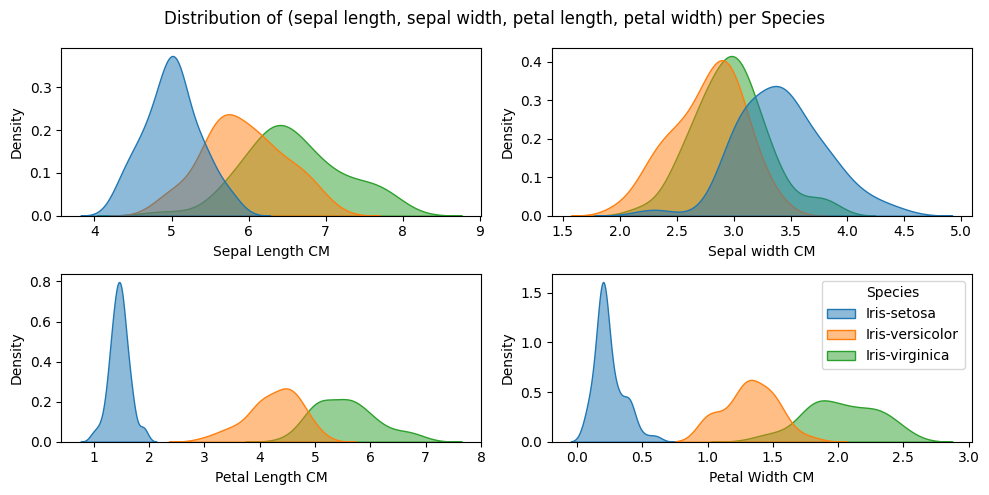

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (sepal length, sepal width, petal length, petal width) per Species')

# Distribution of sepal length per Species
sns.kdeplot(ax = axes[0,0], data = df, x = 'SepalLengthCm', hue = "Species", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("Sepal Length CM")
axes[0,0].get_legend().remove()

# Distribution of sepal width per Species
sns.kdeplot(ax = axes[0,1], data = df, x = 'SepalWidthCm', hue = "Species", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("Sepal width CM")
axes[0,1].get_legend().remove()

# Distribution of petal length per Species
sns.kdeplot(ax = axes[1,0], data = df, x = 'PetalLengthCm', hue = "Species", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("Petal Length CM")
axes[1,0].get_legend().remove()

# Distribution of petal width per Species
sns.kdeplot(ax = axes[1,1], data = df, x = 'PetalWidthCm', hue = "Species", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("Petal Width CM")

plt.tight_layout()

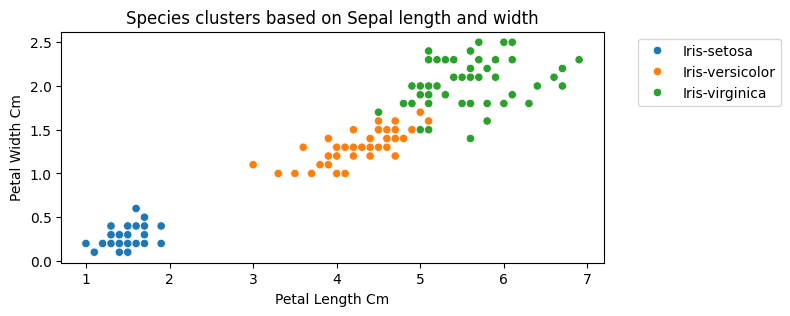

In [9]:
# Scatter plot od petal length vs petal width
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = "Species")
plt.title("Species clusters based on Sepal length and width")
plt.xlabel("Petal Length Cm")
plt.ylabel("Petal Width Cm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

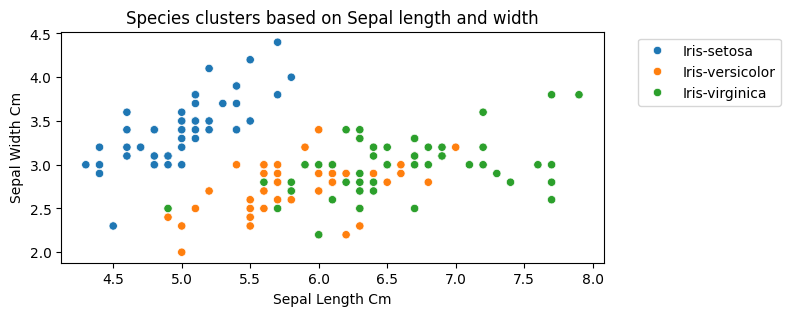

In [10]:
# Scatter plot od sepal length vs petal width
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = "Species")
plt.title("Species clusters based on Sepal length and width")
plt.xlabel("Sepal Length Cm")
plt.ylabel("Sepal Width Cm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **<a id = "prepare">Feature engineering: Data prep for the model</a>**

In [13]:
# 1. Seprate the dependent variable from the independent ones.

X = df.drop("Species", axis = 1)
y = df["Species"]

In [14]:
# 2. Perform a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
# 3. Feature scaling
from sklearn.preprocessing import StandardScaler # import the scaler
scaler = StandardScaler() # initiate it
Scaled_X_train = scaler.fit_transform(X_train) #fit the parameters and use it to trannsform the traning data
Scaled_X_test = scaler.transform(X_test) #transform the test data

### **<a id = "build">Model building</a>** 

In [ ]:
# Logestic Regression 
from sklearn.linear_model import LogisticRegression # import the classifier
log_model = LogisticRegression() #initiate it
log_model.fit(Scaled_X_train, y_train) #fit the model to the training data

LogisticRegression()

### **<a id = "eval1">Model evaluation</a>**

In [17]:
# creating predictions 
y_pred = log_model.predict(Scaled_X_test)

In [26]:
# import evaluation metrics 
from sklearn.metrics import accuracy_score

In [29]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

1.0

In [30]:
import pickle
# 5. Save the trained model and scaler
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(log_model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# 6. Load the model and scaler for prediction
def predict_species(input_data):
    with open("logistic_model.pkl", "rb") as model_file:
        loaded_model = pickle.load(model_file)

    with open("scaler.pkl", "rb") as scaler_file:
        loaded_scaler = pickle.load(scaler_file)

    # Scale the input data
    scaled_input = loaded_scaler.transform([input_data])

    # Predict and return result
    prediction = loaded_model.predict(scaled_input)
    return prediction[0]



Predicted Species: Iris-setosa


In [31]:
# Example usage:
sample_input = [5.1, 3.5, 1.4, 0.2]  # Example feature values
predicted_species = predict_species(sample_input)
print(f"Predicted Species: {predicted_species}")

Predicted Species: Iris-setosa
